In [2]:
# Correcting the style name and re-running the code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Correcting the style name
plt.style.use('seaborn-v0_8')

# Read the dataset
df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\datasets\user_behavior_dataset.csv")



Dataset Overview:
First few rows:
   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944

In [17]:
# Display basic information about the dataset
print("Dataset Overview:")
print("\
First few rows:")
print(df.head())

print("\
Dataset Info:")
print(df.info())

print("\
Basic Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Overview:
First few rows:
   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944

## DATA CLEANING

In [9]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [3]:
# Checking for missing values and duplicates
print("Checking for missing values:")
print(df.isnull().sum())

print("\
Checking for duplicate rows:")
print(df.duplicated().sum())

Checking for missing values:
User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64
Checking for duplicate rows:
0


## Exploratory Data Analysis (EDA)

In [10]:

# Drop duplicates if any
df_cleaned = df.drop_duplicates()

# Verify dataset after cleaning
df_cleaned_info = df_cleaned.info()

missing_values, df_cleaned_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


(User ID                       0
 Device Model                  0
 Operating System              0
 App Usage Time (min/day)      0
 Screen On Time (hours/day)    0
 Battery Drain (mAh/day)       0
 Number of Apps Installed      0
 Data Usage (MB/day)           0
 Age                           0
 Gender                        0
 User Behavior Class           0
 dtype: int64,
 None)

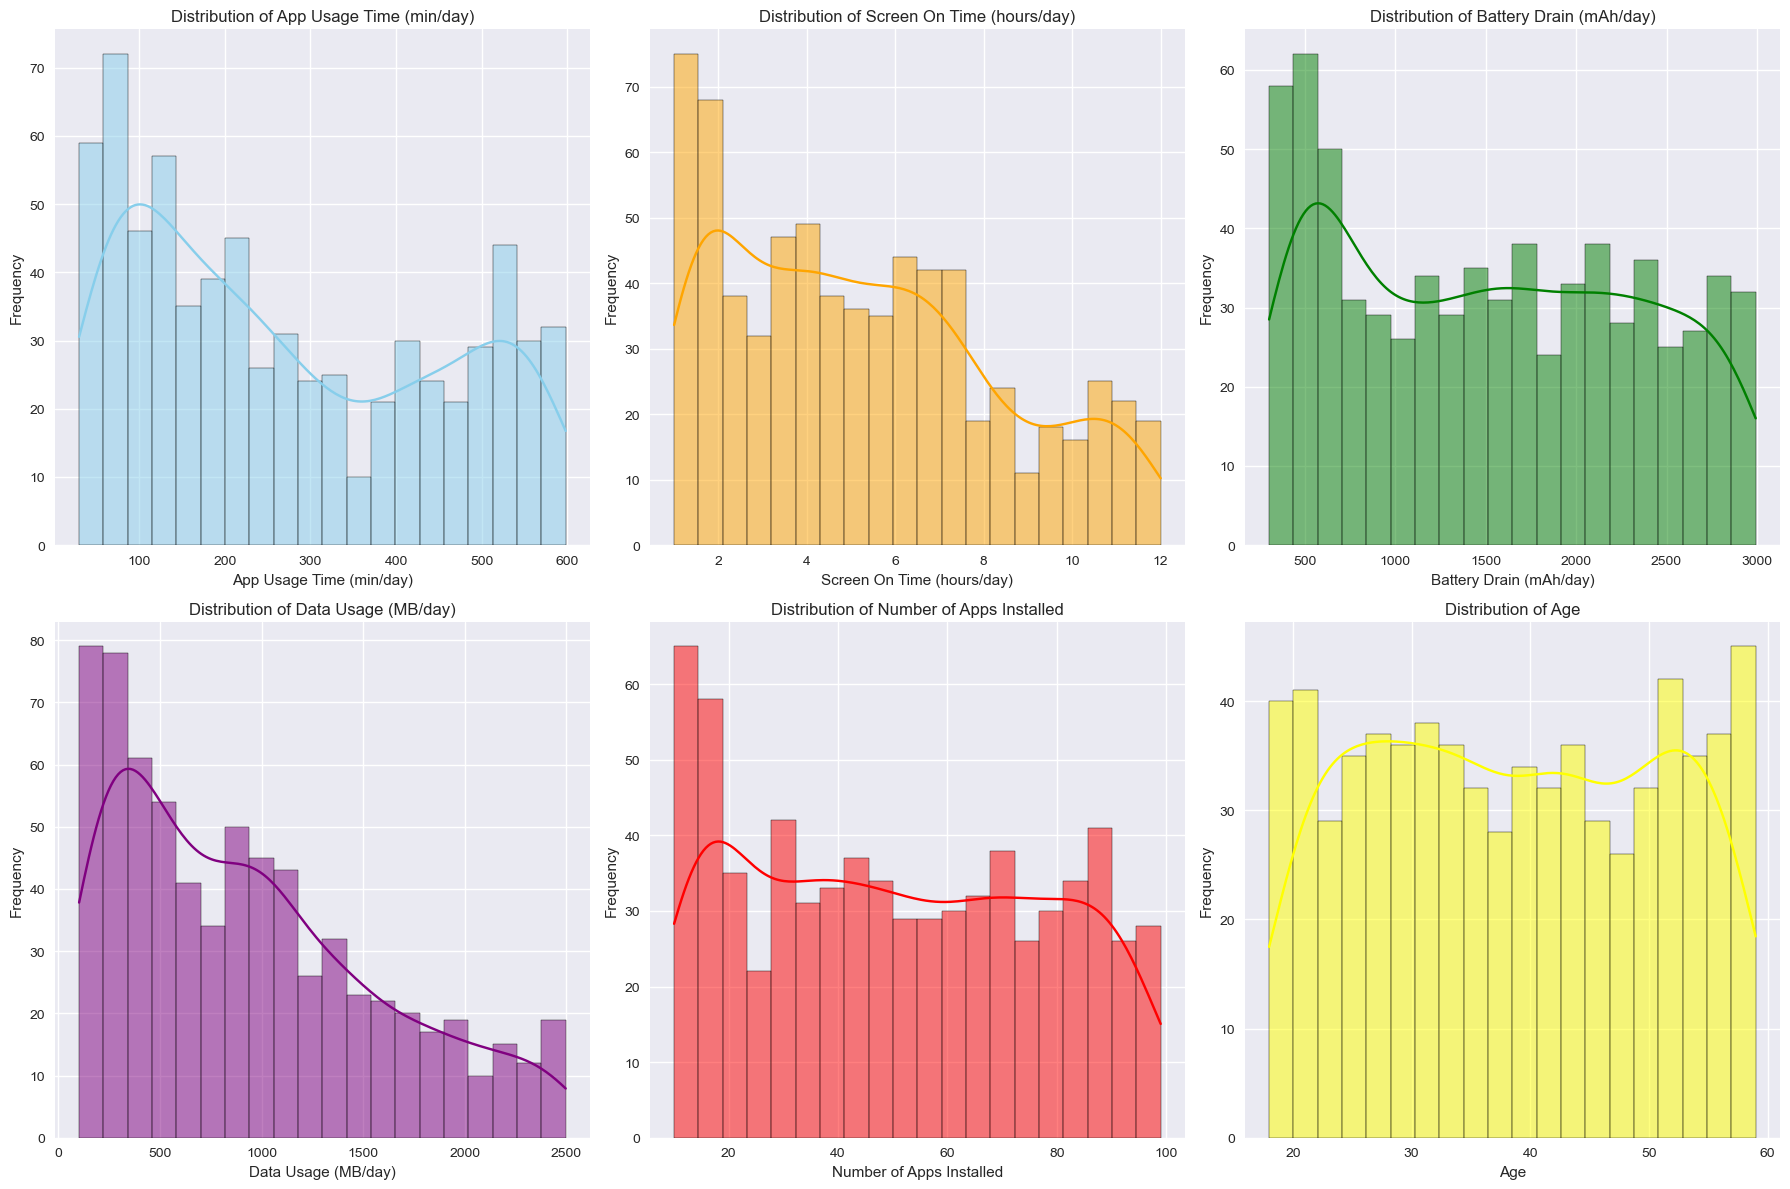

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical columns
summary_stats = df_cleaned.describe()


# Distribution plots for key metrics
plt.figure(figsize=(18, 12))


# App Usage Time distribution
plt.subplot(2, 3, 1)
sns.histplot(df_cleaned['App Usage Time (min/day)'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of App Usage Time (min/day)')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')

# Screen On Time distribution
plt.subplot(2, 3, 2)
sns.histplot(df_cleaned['Screen On Time (hours/day)'], kde=True, bins=20, color='orange')
plt.title('Distribution of Screen On Time (hours/day)')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Frequency')

# Battery Drain distribution
plt.subplot(2, 3, 3)
sns.histplot(df_cleaned['Battery Drain (mAh/day)'], kde=True, bins=20, color='green')
plt.title('Distribution of Battery Drain (mAh/day)')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Frequency')

# Data Usage (MB/day) distribution
plt.subplot(2, 3, 4)
sns.histplot(df_cleaned['Data Usage (MB/day)'], kde=True, bins=20, color='purple')
plt.title('Distribution of Data Usage (MB/day)')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Frequency')

# Number of Apps Installed distribution
plt.subplot(2, 3, 5)
sns.histplot(df_cleaned['Number of Apps Installed'], kde=True, bins=20, color='red')
plt.title('Distribution of Number of Apps Installed')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Frequency')

# Age distribution
plt.subplot(2, 3, 6)
sns.histplot(df_cleaned['Age'], kde=True, bins=20, color='yellow')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




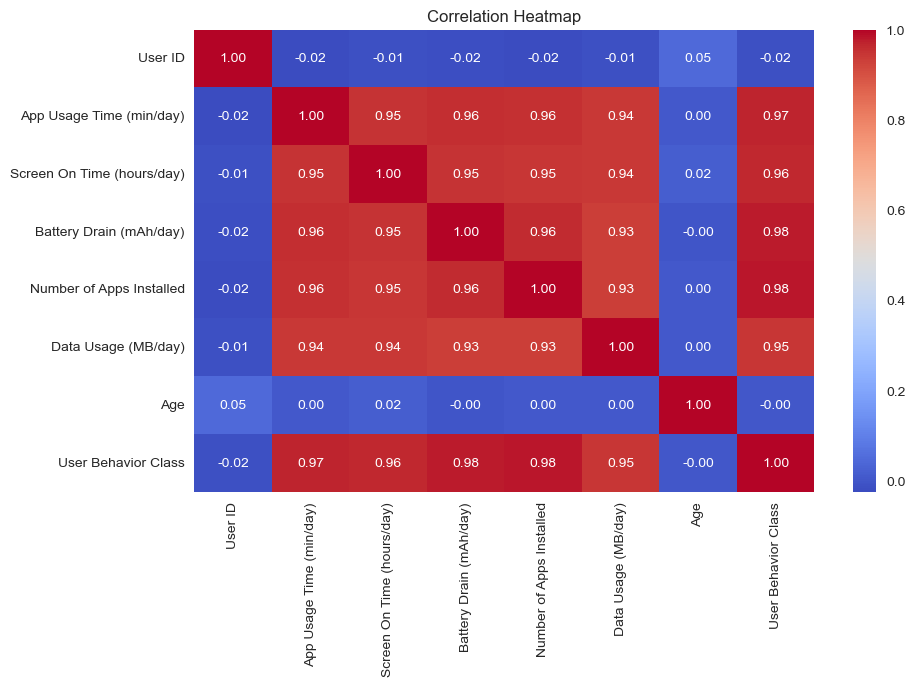

In [8]:
# Select only numeric columns for the correlation matrix
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [19]:
print(df_cleaned.dtypes)


User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object


In [20]:
df_cleaned['App Usage Time (min/day)'] = pd.to_numeric(df_cleaned['App Usage Time (min/day)'], errors='coerce')
df_cleaned['Screen On Time (hours/day)'] = pd.to_numeric(df_cleaned['Screen On Time (hours/day)'], errors='coerce')
df_cleaned['Battery Drain (mAh/day)'] = pd.to_numeric(df_cleaned['Battery Drain (mAh/day)'], errors='coerce')
df_cleaned['Data Usage (MB/day)'] = pd.to_numeric(df_cleaned['Data Usage (MB/day)'], errors='coerce')


In [21]:
numeric_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                   'Battery Drain (mAh/day)', 'Data Usage (MB/day)']
gender_analysis = df_cleaned.groupby('Gender')[numeric_columns].mean()


In [22]:
df_cleaned = df_cleaned.fillna(0)  # Replace NaN with 0 (or use another strategy)


In [23]:
# Step 1: Ensure the relevant columns are numeric
numeric_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                   'Battery Drain (mAh/day)', 'Data Usage (MB/day)']
for col in numeric_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Step 2: Group by Gender and calculate mean
gender_analysis = df_cleaned.groupby('Gender')[numeric_columns].mean()

# Step 3: Group by User Behavior Class and calculate mean
user_behavior_analysis = df_cleaned.groupby('User Behavior Class')[numeric_columns].mean()

print(gender_analysis)
print(user_behavior_analysis)


        App Usage Time (min/day)  Screen On Time (hours/day)  \
Gender                                                         
Female                271.967262                    5.261310   
Male                  270.354396                    5.283242   

        Battery Drain (mAh/day)  Data Usage (MB/day)  
Gender                                                
Female              1519.815476           914.321429  
Male                1530.090659           943.978022  
                     App Usage Time (min/day)  Screen On Time (hours/day)  \
User Behavior Class                                                         
1                                   60.426471                    1.490441   
2                                  131.972603                    3.037671   
3                                  235.398601                    4.955944   
4                                  395.748201                    6.909353   
5                                  541.419118                

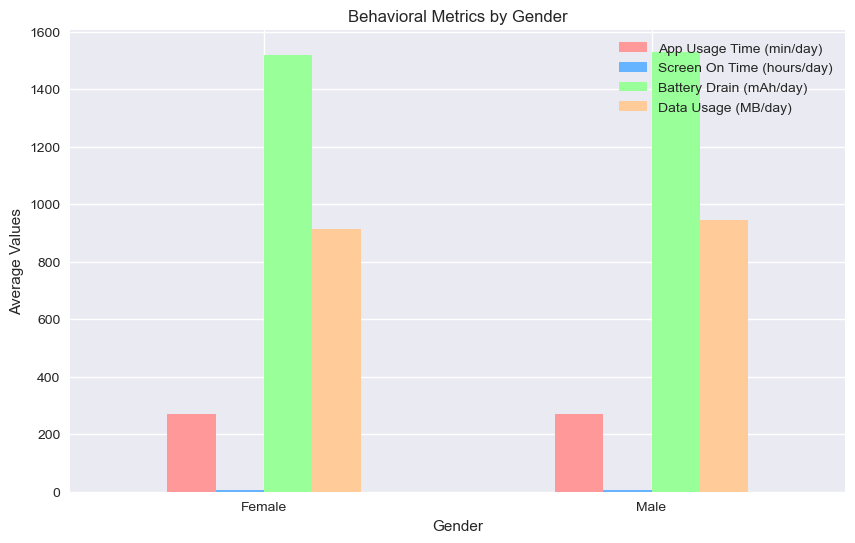

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart for Gender-wise Metrics
gender_analysis.plot(kind='bar', figsize=(10, 6), color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Behavioral Metrics by Gender')
plt.ylabel('Average Values')
plt.xlabel('Gender')
plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.show()


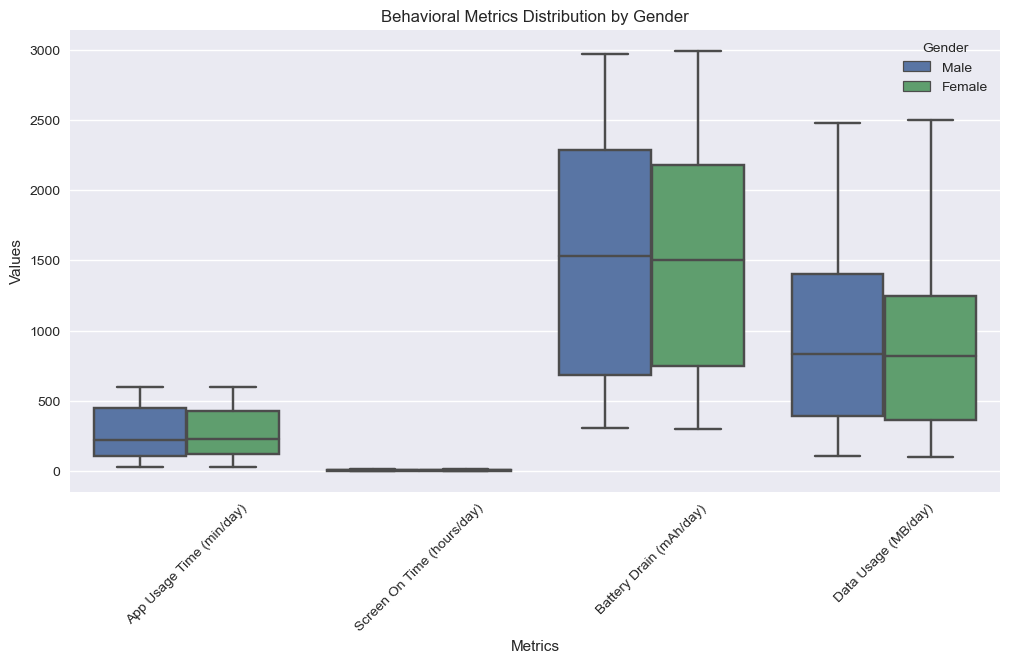

In [26]:
# Boxplot for Gender-wise Metrics
melted_gender_data = df_cleaned.melt(id_vars=['Gender'], 
                                     value_vars=['App Usage Time (min/day)', 
                                                 'Screen On Time (hours/day)', 
                                                 'Battery Drain (mAh/day)', 
                                                 'Data Usage (MB/day)'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_gender_data, x='variable', y='value', hue='Gender')
plt.title('Behavioral Metrics Distribution by Gender')
plt.ylabel('Values')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.show()


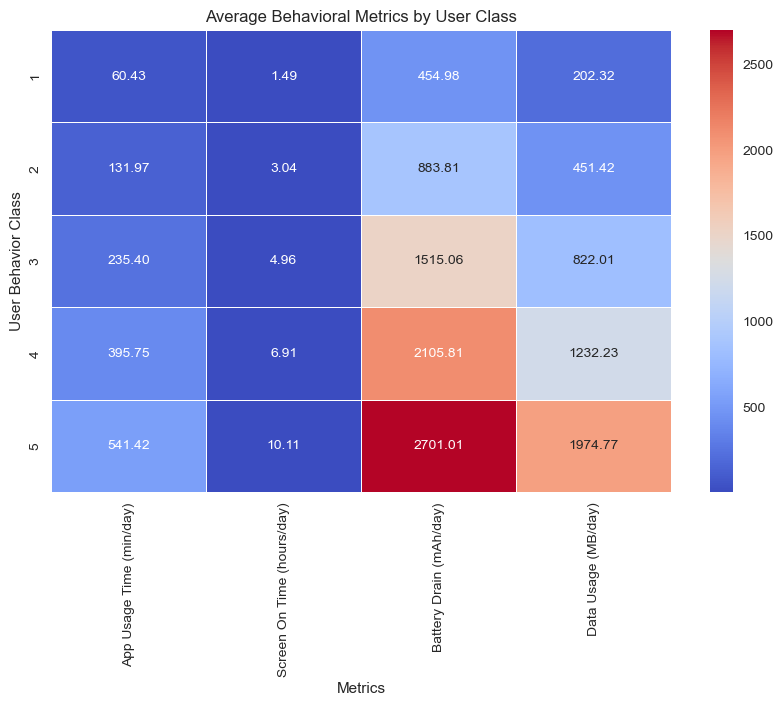

In [27]:
# Heatmap for User Behavior Class Metrics
plt.figure(figsize=(10, 6))
sns.heatmap(user_behavior_analysis, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Average Behavioral Metrics by User Class')
plt.ylabel('User Behavior Class')
plt.xlabel('Metrics')
plt.show()


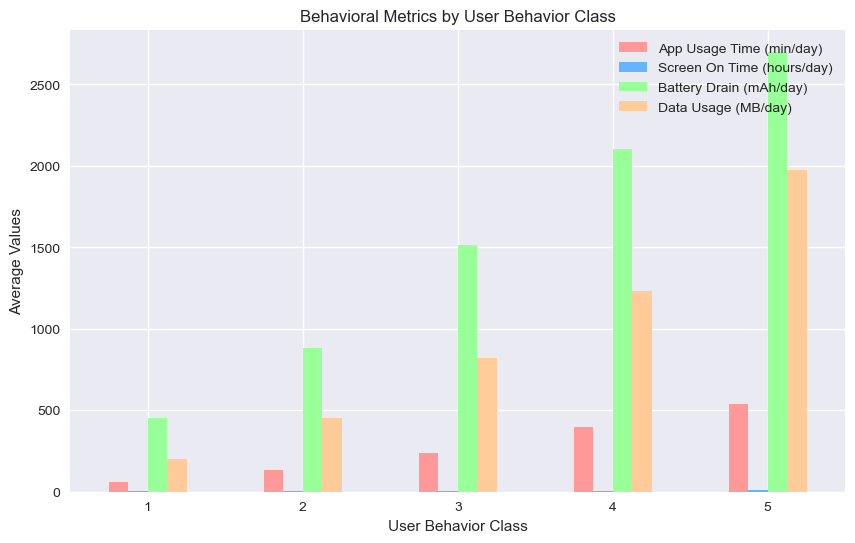

In [28]:
# Grouped Bar Chart for User Behavior Metrics
user_behavior_analysis.plot(kind='bar', figsize=(10, 6), color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Behavioral Metrics by User Behavior Class')
plt.ylabel('Average Values')
plt.xlabel('User Behavior Class')
plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


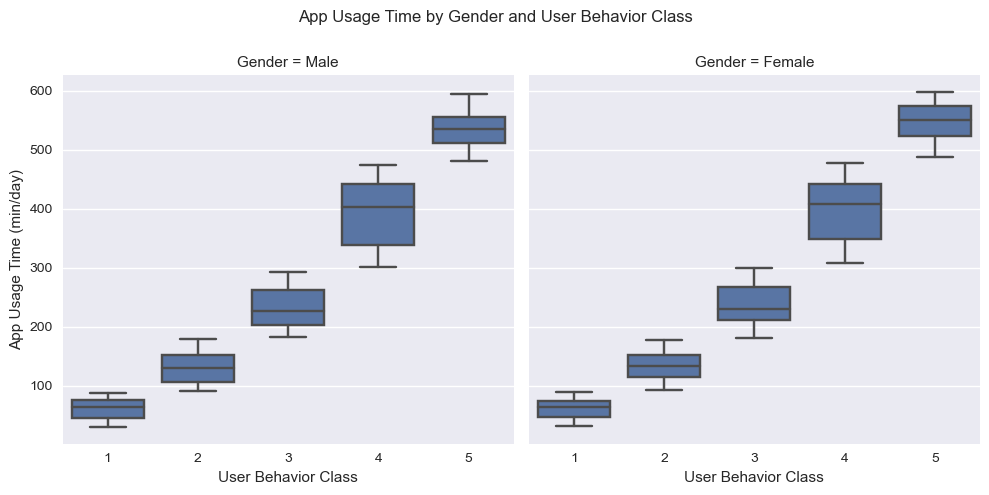

In [29]:
# Facet Grid for Combined Analysis
g = sns.FacetGrid(df_cleaned, col="Gender", height=5, aspect=1)
g.map(sns.boxplot, "User Behavior Class", "App Usage Time (min/day)", order=user_behavior_analysis.index)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('App Usage Time by Gender and User Behavior Class')
plt.show()
